<a href="https://colab.research.google.com/github/MathieuFan22/TP-ML-Mirada/blob/Partie-C/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('diabetes.csv')

# Afficher les premières lignes
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
import numpy as np

cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


# Remplacer les zéros par NaN dans les colonnes concernées
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Vérifier le nombre de valeurs manquantes
df.isnull().sum()

# Remplacer les NaN par la médiane des colonnes
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

from sklearn.preprocessing import StandardScaler

# Séparer les features (X) et la cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Appliquer la standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir X_scaled en DataFrame pour garder les noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Vérification
X_scaled.head()





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


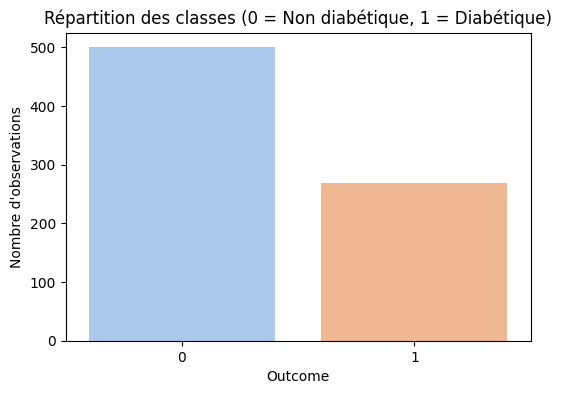

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

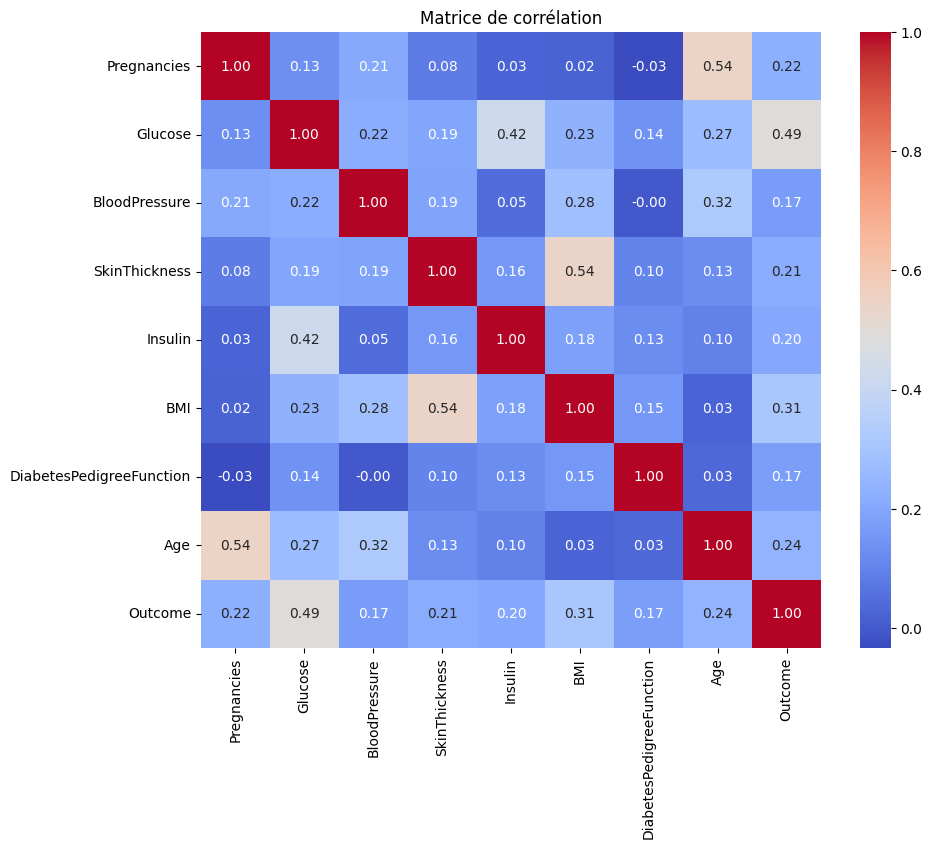

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille du graphique
plt.figure(figsize=(6, 4))

# Barplot du nombre de 0 et 1 sans warning
sns.countplot(x='Outcome', data=df, hue='Outcome', palette='pastel', legend=False)

# Ajout des annotations
plt.title('Répartition des classes (0 = Non diabétique, 1 = Diabétique)')
plt.xlabel('Outcome')
plt.ylabel('Nombre d\'observations')

plt.show()

# Statistiques générales
print(df.describe())

# Statistiques par classe de Outcome
print(df.groupby('Outcome').mean())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()






In [13]:
from sklearn.model_selection import train_test_split

# Étape 1 : Split en 80% (train+val) et 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Étape 2 : Split les 80% restants en 60% train et 20% val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
# (0.25 * 80% = 20%)

# Vérification des tailles
print(f"Train: {X_train.shape[0]} échantillons")
print(f"Validation: {X_val.shape[0]} échantillons")
print(f"Test: {X_test.shape[0]} échantillons")


Train: 460 échantillons
Validation: 154 échantillons
Test: 154 échantillons


In [26]:
X_scaled.dtypes

# Ajouter temporairement Outcome pour corrélation
Xy = X_scaled.copy()
Xy['Outcome'] = y

# Corrélation avec la cible
correlations = Xy.corr()['Outcome'].drop('Outcome').sort_values(ascending=False)
print(correlations)






Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [19]:
y_train.value_counts(normalize=True)

from imblearn.over_sampling import SMOTE

# Appliquer SMOTE uniquement sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérification du nouvel équilibre
from collections import Counter
print("Distribution après SMOTE :", Counter(y_train_resampled))




Distribution après SMOTE : Counter({0: 300, 1: 300})


Accuracy : 0.7597
Precision: 0.6441
Recall   : 0.7037
F1-score : 0.6726


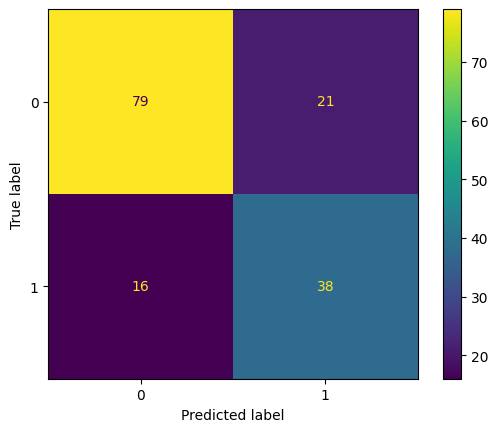

In [23]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle avec pondération des classes
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Prédictions sur les données de validation
y_val_pred = model.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des métriques
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Affichage
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()





Évaluation finale sur le jeu de test :
Accuracy : 0.7273
Precision: 0.5968
Recall   : 0.6852
F1-score : 0.6379


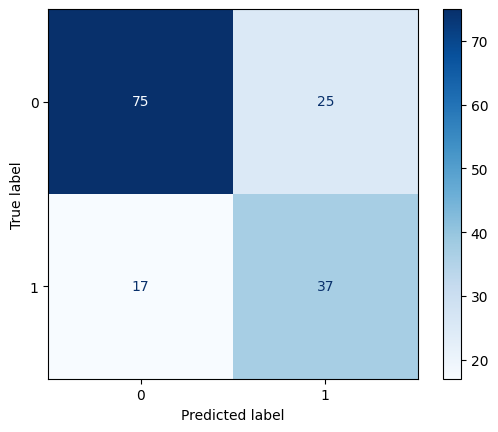

In [29]:
# Prédictions finales sur les données de test
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des métriques
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Affichage
print("Évaluation finale sur le jeu de test :")
print(f"Accuracy : {acc_test:.4f}")
print(f"Precision: {prec_test:.4f}")
print(f"Recall   : {rec_test:.4f}")
print(f"F1-score : {f1_test:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')






🔍 Importance des variables (régression logistique) :
                    Feature  Coefficient
1                   Glucose     1.257015
5                       BMI     0.802034
6  DiabetesPedigreeFunction     0.341214
0               Pregnancies     0.299692
7                       Age     0.185803
2             BloodPressure    -0.147238
4                   Insulin    -0.093884
3             SkinThickness    -0.091639


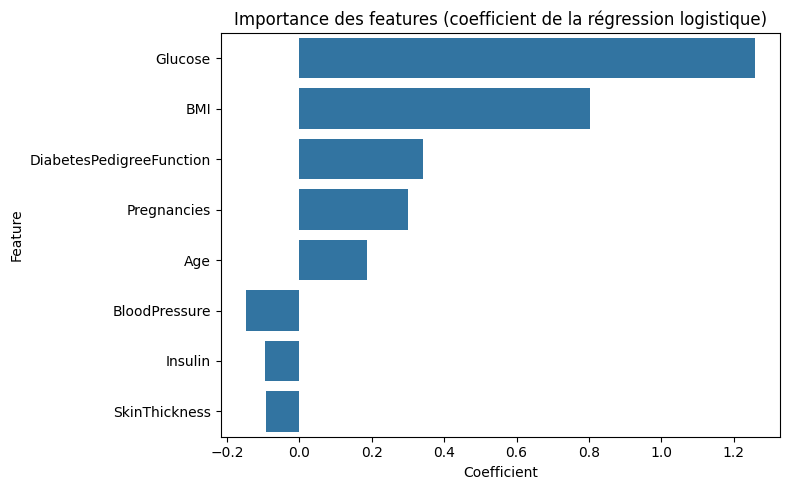

Vrais négatifs : 75
Faux positifs  : 25
Faux négatifs  : 17
Vrais positifs : 37


In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des noms et coefficients
coefficients = model.coef_[0]
features = X_train.columns

# Création d’un DataFrame pour trier
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['AbsCoef'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)

# Affichage
print("🔍 Importance des variables (régression logistique) :")
print(coef_df[['Feature', 'Coefficient']])

plt.figure(figsize=(8, 5))
# Suppression de palette pour éviter le warning
sns.barplot(data=coef_df, y='Feature', x='Coefficient')
plt.title("Importance des features (coefficient de la régression logistique)")
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Vrais négatifs : {tn}")
print(f"Faux positifs  : {fp}")
print(f"Faux négatifs  : {fn}")
print(f"Vrais positifs : {tp}")





In [36]:
 # Conclusion

 print("""Le modèle de régression logistique offre de bonnes performances pour prédire le diabète.

La gestion du déséquilibre des classes a amélioré la détection des cas positifs.

Variables clés influentes : glycémie (Glucose), BMI, âge.

Limites : taille réduite du dataset et risque de faux négatifs.

Recommandations pour le déploiement :

Utiliser comme outil d’aide à la décision, pas comme diagnostic unique.

Suivi régulier de la performance en production.

Recommandations pour la collecte de données :

Augmenter la taille et la diversité des données.

Prévoir un réentraînement périodique du modèle.
       """)

Le modèle de régression logistique offre de bonnes performances pour prédire le diabète.

La gestion du déséquilibre des classes a amélioré la détection des cas positifs.

Variables clés influentes : glycémie (Glucose), BMI, âge.

Limites : taille réduite du dataset et risque de faux négatifs.

Recommandations pour le déploiement :

Utiliser comme outil d’aide à la décision, pas comme diagnostic unique.

Suivi régulier de la performance en production.

Recommandations pour la collecte de données :

Augmenter la taille et la diversité des données.

Prévoir un réentraînement périodique du modèle.
      
